## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [ ]:
name='Petrov Artem'

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [48]:
#code here (1 pt.)
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')
df.head()

,sales,month,day,year
0,134.71,10,31,2020
1,137.74,7,31,2020
2,134.62,4,30,2020
3,141.67,1,31,2020
4,127.99,10,31,2019


### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [49]:
# code here (0.5 pt.)
df.isna().value_counts()

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [44]:
# answer (0.5 pt.)
# since all booleans are False the answer is 0

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [45]:
# answer (0.5 pt.)
# separate column for month, column for day, and column for year


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [50]:
# code here (0.5 pt.)
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [51]:
# code here (0.25 pt.)
df.index = df['date']
df.head()

,sales,month,day,year,date
date,,,,,
2020-10-31,134.71,10,31,2020,2020-10-31
2020-07-31,137.74,7,31,2020,2020-07-31
2020-04-30,134.62,4,30,2020,2020-04-30
2020-01-31,141.67,1,31,2020,2020-01-31
2019-10-31,127.99,10,31,2019,2019-10-31


What is the size of the dataset?

use ```.shape```

In [52]:
# code here (0.25 pt.)
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [53]:
# code here (0.25 pt.)
df=df.drop(['day', 'year','month','date'], axis=1)
df.head()

,sales
date,
2020-10-31,134.71
2020-07-31,137.74
2020-04-30,134.62
2020-01-31,141.67
2019-10-31,127.99


What is the size of the dataset now?

In [54]:
# code here (0.25 pt.)
df.shape

(147, 1)

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [55]:
# code here (0.25 pt.)
y=df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [56]:
# code here (0.25 pt.)
y = np.flip(y)

Plot the series using ```plot_series()```

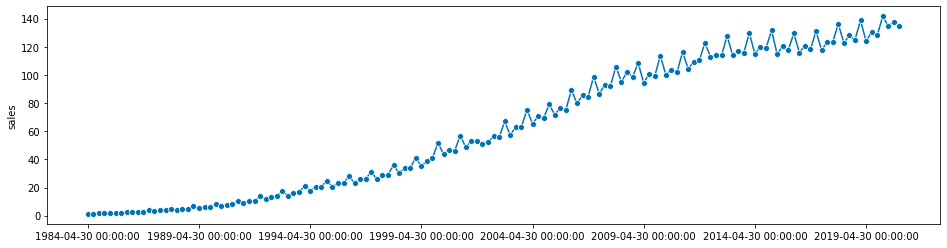

In [58]:
# code here (0.25 pt.)
plot_series(y)
plt.show()

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [24]:
# code here (0.5 pt.)
train, test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

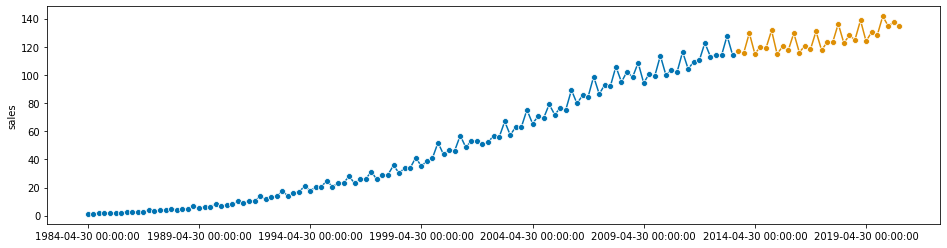

In [59]:
# code here (0.25 pt.)
plot_series(train, test)
plt.show()

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [60]:
# code here (0.5 pt.)
model_MAA = ETSModel(train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA=model_MAA.fit()

Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [61]:
# code here (0.5 pt.)
model_AAM = ETSModel(train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM=model_AAM.fit()

### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [62]:
# code here (0.25 pt.)
fit_MAA_forecast = fit_MAA.forecast(steps=30)

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [63]:
# code here (0.25 pt.)
fit_AAM_forecast = fit_AAM.forecast(steps=30)

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

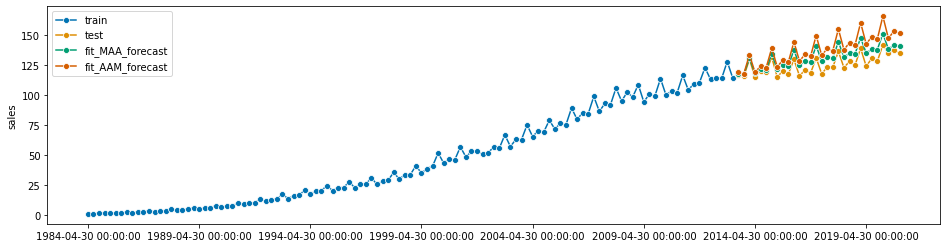

In [65]:
# code here (0.5 pt.)
plot_series(train, test, fit_MAA_forecast, fit_AAM_forecast, labels=['train','test','fit_MAA_forecast','fit_AAM_forecast'])
plt.show()

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [66]:
# code here (0.5 pt.)
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
upper_int = pred_MAA['pi_upper']
lower_int = pred_MAA['pi_lower']

Plot interval predictions:

```plot_series()```

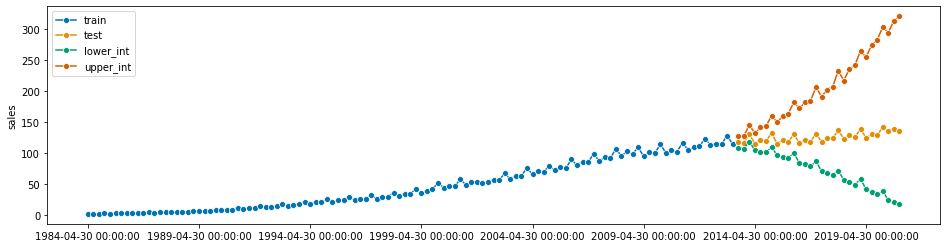

In [67]:
# code here (0.5 pt.)
plot_series(train, test, lower_int,upper_int, labels=['train','test','lower_int','upper_int']   )
plt.show()

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [33]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int = pred_AAM['pi_upper']
lower_int = pred_AAM['pi_lower']

Plot interval predictions:

```plot_series()```

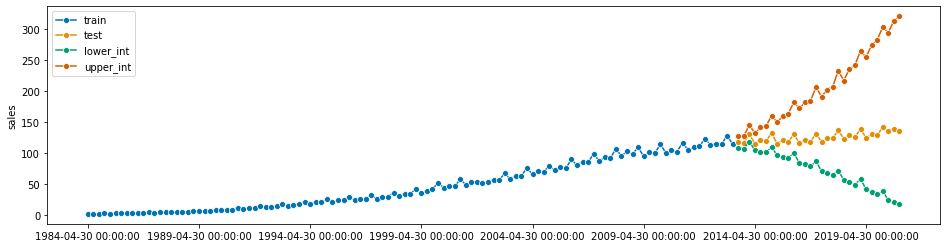

In [68]:
# code here (0.5 pt.)
plot_series(train, test, lower_int,upper_int, labels=['train','test','lower_int','upper_int'])
plt.show()

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [69]:
# code here (0.5 pt.) MAA
mean_absolute_error(test, fit_MAA_forecast)

6.394546605755498

In [70]:
# code here (0.5 pt.) AAM
mean_absolute_error(test, fit_AAM_forecast)

12.709161383337841

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [37]:
# code here (0.5 pt.) MAA
mean_squared_error(test, fit_MAA_forecast)

50.57147037477893

In [38]:
# code here (0.5 pt.) AAM
mean_squared_error(test, fit_AAM_forecast)

195.9700976122845

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [39]:
# code here (0.5 pt.)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [40]:
# code here (0.25 pt.) MAA
mean_absolute_percentage_error(test, fit_MAA_forecast)

5.091701024681435

In [41]:
# code here (0.25 pt.) AAM
mean_absolute_percentage_error(test, fit_AAM_forecast)

9.993524328604307

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [71]:
# code here (1 pt.)
# the best one is MAA